<a href="https://colab.research.google.com/github/4k5h1t/Learning-ML/blob/main/DecisionTreeClassifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

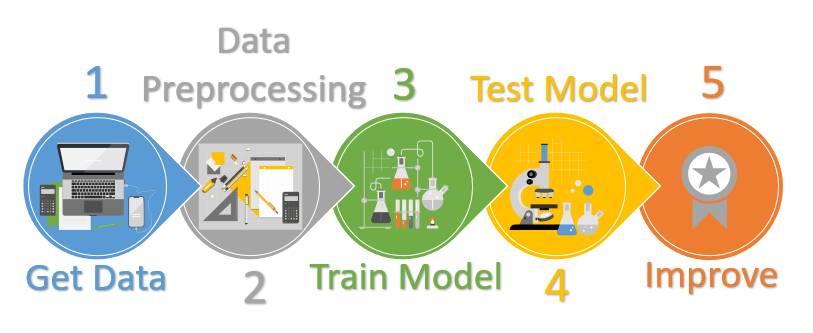

# Topics
1.   Decision Tree Classification
2.   Simple Example
3. Advantages and Disadvantages









#1.Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [ ]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.958
Accuracy on test set: 0.909


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

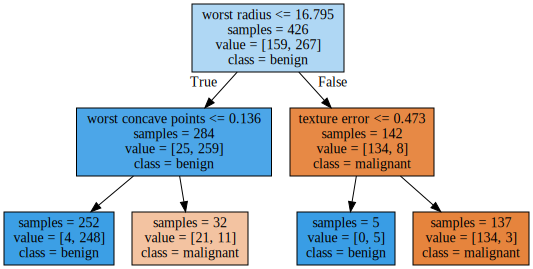

In [ ]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

#2.Numerical Example

https://raw.githubusercontent.com/Jayku88/Machine-Learning-Lab/main/test.csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving decisionTree.csv to decisionTree.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv('decisionTree.csv')

In [ ]:
df

,F1,Class
0,8,No
1,26,Yes
2,39,Yes
3,20,Yes
4,13,No
5,28,Yes
6,27,Yes
7,26,No
8,27,No
9,14,No


In [ ]:
y=df.Class
x=df.drop('Class',axis=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
tree = DecisionTreeClassifier(criterion="entropy", max_depth=1)
tree.fit(x, y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
import numpy as np
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["No", "Yes"],feature_names=np.array(['Income']))

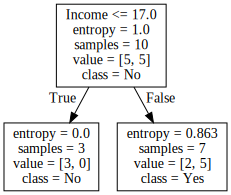

In [ ]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

##Detailed Explanation

**Note**: This is a brief explanation on a small sample. The same procedure will be repeated many times before getting the final result

**Step 1**: Calculate Entropy of Class

$$E(s)= \sum_{i=1}^{c} -p_ilog_2(p_i) $$

Here s=Class and Classes are Yes and No, so
$$E(Class)=  -p_{Yes}log_2(p_{Yes})-p_{No}log_2(p_{No}) $$
Substituting,
$$E(Class)=  -\frac{3}{7}log_2(\frac{3}{7})-\frac{2}{7}log_2(\frac{2}{7})=0.985 $$

**Step 2**: Calculate Conditional entropy for different rules and select rule with maximum rule as initial condition for split. Now Assume rule as $Income<=31$ (Explain in Live Session how 31 is obtained)
$$E(Class|Income<=31)=  -p_{Yes|Income<=31}log_2(p_{p_{Yes|Income<=31}})-p_{No|Income<=31}log_2(p_{No|Income<=31}) $$
$$E(Class|Income<=31)=  -\frac{3}{5}log_2(\frac{3}{5})-\frac{2}{5}log_2(\frac{2}{5})=0.971 $$
$$E(Class|Income>31)=  -p_{Yes|Income>31}log_2(p_{p_{Yes|Income>31}})-p_{No|Income>31}log_2(p_{No|Income>31}) $$
$$E(Class|Income>31)=  0-\frac{2}{2}log_2(\frac{2}{2})=0 $$
Weighted Average
$$E(Class|Income)=  -p_{Income>31}E(Class|Income>31)-p_{Income<=31}E(Class|Income<=31) $$
$$E(Class|Income)=  0+\frac{5}{7}.971=.693 $$
**Step 3**: Calculate Information Gain
$$Gain=E(Class)-E(Class/Income)$$
$$Gain=.985-.693=.292$$

Procedure is to select rule with maximum information gain. Here we have shown evaluation of gain for one rule. For this example $$Income<=31$$ is the initial condition. 

Convince yourself by Calculating Gain for rule $Income<=18$



## For the rule Income <= 18

**Step 1**: Calculate Entropy of Class

$$E(s)= \sum_{i=1}^{c} -p_ilog_2(p_i) $$

Here s=Class and Classes are Yes and No, so
$$E(Class)=  -p_{Yes}log_2(p_{Yes})-p_{No}log_2(p_{No}) $$
Substituting,
$$E(Class)=  -\frac{3}{7}log_2(\frac{3}{7})-\frac{2}{7}log_2(\frac{2}{7})=0.985 $$

**Step 2**: Calculate Conditional entropy for different rules and select rule with maximum rule as initial condition for split. Now Assume rule as $Income<=18$


$$E(Class|Income<=18)=  -p_{Yes|Income<=18}log_2({p_{Yes|Income<=18}})-p_{No|Income<=18}log_2(p_{No|Income<=18}) $$
$$E(Class|Income<=18)=  -\frac{1}{2}log_2(\frac{1}{2})-\frac{1}{2}log_2(\frac{1}{2})=1 $$

  
$$E(Class|Income>18)=  -p_{Yes|Income>18}log_2({p_{Yes|Income>18}})-p_{No|Income>18}log_2(p_{No|Income>18}) $$
$$E(Class|Income>18)=  -\frac{2}{5}log_2(\frac{2}{5})-\frac{3}{5}log_2(\frac{3}{5})=0.528+0.4422=0.9702 $$
Weighted Average
$$E(Class|Income)=  -p_{Income>18}E(Class|Income>18)-p_{Income<=18}E(Class|Income<=18) $$
$$E(Class|Income)=  \frac{5}{7}.9702+\frac{2}{7}=0.978 $$
**Step 3**: Calculate Information Gain
$$Gain=E(Class)-E(Class|Income)$$
$$Gain=.985-.978=0.007$$

#3.Advantages and Disadvantages

**Advantages**
1. Simple to understand and to interpret. Trees can be visualised.
2. Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
3. The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

4. Able to handle both numerical and categorical data. However scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.

5. Able to handle multi-output problems.

6. Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

7. Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

8. Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

**Disadvantages**
1. Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. 2.2. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

3. Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

4. Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.

5. The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

6. There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

7. Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

#4.Optional (Upload Kaggle Certificate for course Intermediate Machine Learning)

Your Certificate Here
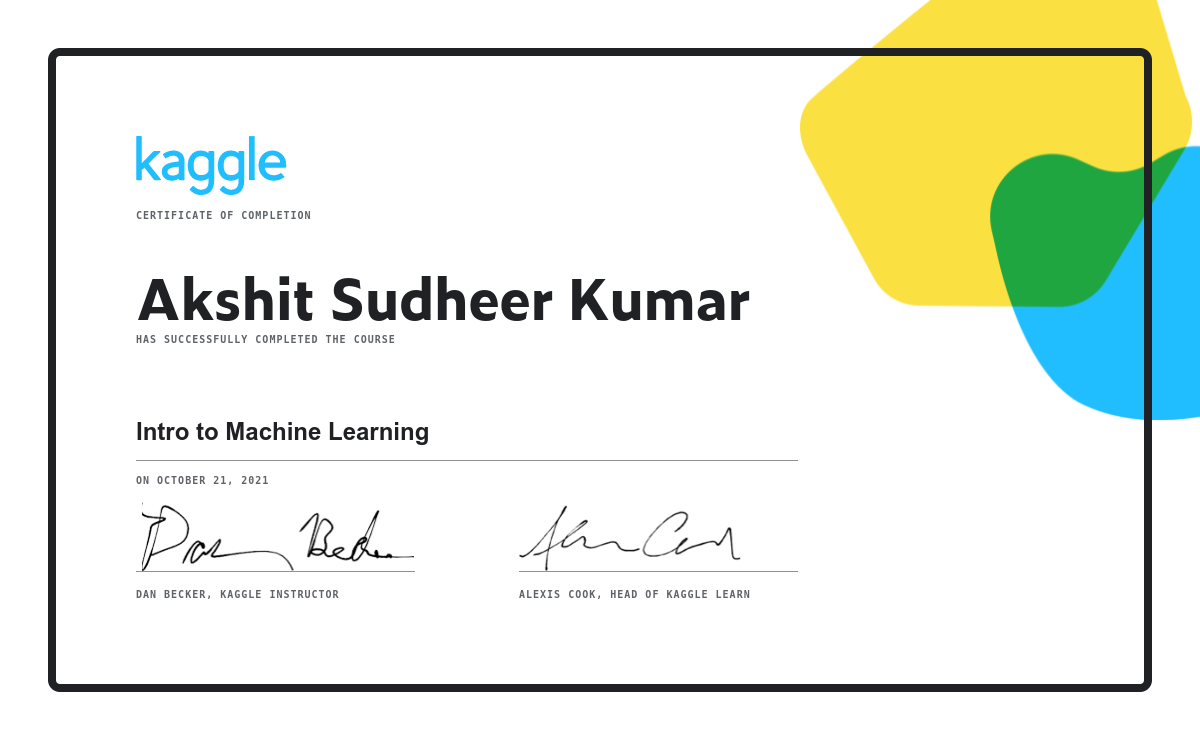

# Reflections


1.   Decision Tree Classification
2.   Advantages and Disadvantages





In [ ]:
#@title  { run: "auto", vertical-output: true }
#@title  { run: "auto", vertical-output: true }
name = "Akshit Sudheer Kumar" #@param {type:"string"}
roll_number = "AM.EN.U4AIE20110" #@param {type:"string"}
self_assessment = 10 #@param {type:"slider", min:1, max:10, step:1}
print("Name : ",name)
print("Roll Number : ",roll_number)
print("Self Assessment Marks : ",self_assessment,"/10")

Name :  Akshit Sudheer Kumar
Roll Number :  AM.EN.U4AIE20110
Self Assessment Marks :  10 /10
